`ApJdataFrames` 001: Luhman2003
---
`Title`: A Census of the Young Cluster IC 348  
`Authors`: Luhman K.L., Stauffer J.R., Muench A.A., Rieke G.H., Lada E.A., Bouvier J., Lada C.J. 

Data is from this paper:
http://iopscience.iop.org/0004-637X/593/2/1093/

In [1]:
%pylab inline

import seaborn as sns
sns.set_context("notebook", font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


We're skipping **Table 1** because it is an observing log.

## Table 2- Members of IC348

Since this table is formatted in the `CDS` format, it is easiest to take advantage of the `Astropy` functionality, `ascii.read`, which automatically detects the header formatting.  We will also take advantage of the fact that `ascii.read` can accept a url as an argument, so we won't have to actually save the data locally.  Let's hope ApJ doesn't change their web link though.

In [2]:
from astropy.io import ascii

In [3]:
#!curl -o ../data/Luhman2003/Luhman2003_Table2.txt http://iopscience.iop.org/0004-637X/593/2/1093/fulltext/datafile2.txt

In [4]:
data = ascii.read("http://iopscience.iop.org/0004-637X/593/2/1093/fulltext/datafile2.txt")

In [5]:
data[0:2]

ID,f_ID,RAh,RAm,RAs,DEd,DEm,DEs,SpType,r_SpType,Adopt,Mem,Teff,AJ,LBol,R-I,Imag,I-Z,J-H,H-K,Kmag,RefPhot,IMF?
,,h,min,s,deg,arcmin,arcsec,,,,,K,mag,solLum,mag,mag,mag,mag,mag,mag,,
string40,string8,int64,int64,float64,int64,int64,float64,string256,string40,string40,string80,int64,float64,float64,float64,float64,float64,float64,float64,float64,string8,string24
1,h,3,44,34.2,32,9,46.3,"B5V,B3-B4,<F8(IR)","1,2,2",B5,"A_V_,pm",15400,0.54,605.0,--,--,--,0.15,0.12,6.51,3,yes
2,--,3,44,35.36,32,10,4.6,"A2,<F8(IR)","1,2",A2,"A_V_,pm",8970,1.08,137.0,--,--,--,0.42,0.29,7.25,3,yes


In [6]:
print data.colnames

['ID', 'f_ID', 'RAh', 'RAm', 'RAs', 'DEd', 'DEm', 'DEs', 'SpType', 'r_SpType', 'Adopt', 'Mem', 'Teff', 'AJ', 'LBol', 'R-I', 'Imag', 'I-Z', 'J-H', 'H-K', 'Kmag', 'RefPhot', 'IMF?']


I am using seaborn (imported as **`sns`**), to set nice-looking figure deafaults.

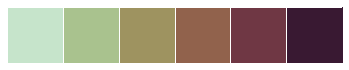

In [7]:
cmap = sns.palettes.cubehelix_palette(start=0.2, rot=0.7,as_cmap=True)
sns.palplot(sns.palettes.cubehelix_palette(start=0.2, rot=0.7))

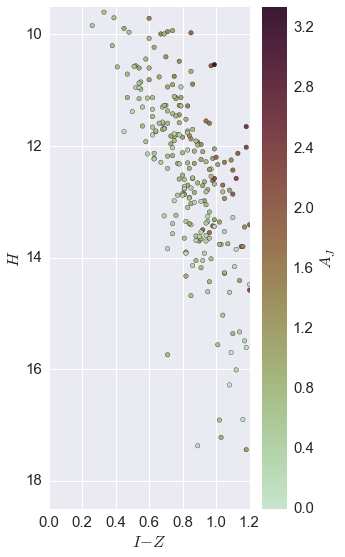

In [8]:
plt.figure(figsize=(4.5, 9))

plt.scatter(data['I-Z'].data, data['H-K'].data + data['Kmag'].data, c=data['AJ'].data, cmap=cmap)

plt.xlim(0, 1.2)
plt.ylim(18.5, 9.5)
cbar = plt.colorbar()
cbar.set_label('$A_J$')
plt.xlabel("$I-Z$")
plt.ylabel("$H$")

## Table 3 - Foreground members

This table is *not* formatted as CDS.  Instead it is just raw $\LaTeX$, with no header columns.  So I will have to assign the column names manually, which I copy and paste and parse by hand.  Then I use pandas (imported as **`pd`**) to read the tab-separated file (`sep='\t'`).

In [9]:
import pandas as pd

In [10]:
col_names = ["ID","RA","Dec","SpectralType","Ref","ForegroundEvidence","R-I","I","I-Z","J-H","H-Ks","Ks"]
tbl3 = pd.read_csv('http://iopscience.iop.org/0004-637X/593/2/1093/fulltext/57692.tb3.txt', sep='\t', 
                   header=None, na_values='\ldots', names=col_names)

In [11]:
tbl3.head()

,ID,RA,Dec,SpectralType,Ref,ForegroundEvidence,R-I,I,I-Z,J-H,H-Ks,Ks
0,18,03 43 58.04,32 09 47.1,F8,1,pm,NaN,NaN,NaN,0.28,0.13,9.36
1,28,03 44 21.06,32 07 38.7,F8,1,pm,NaN,NaN,NaN,0.30,0.11,9.62
2,54,03 44 49.59,32 16 45.7,K1-K2,2,"Li, A_{V}",NaN,12.04,0.32,0.50,0.16,10.50
3,57,03 44 48.51,32 15 28.1,K3-K4,2,pm,NaN,12.45,0.36,0.68,0.15,10.56
4,77,03 44 43.44,32 08 17.4,"M1, K5-M0(IR)","3, 2",pm,0.96,12.90,0.37,0.62,0.23,10.85


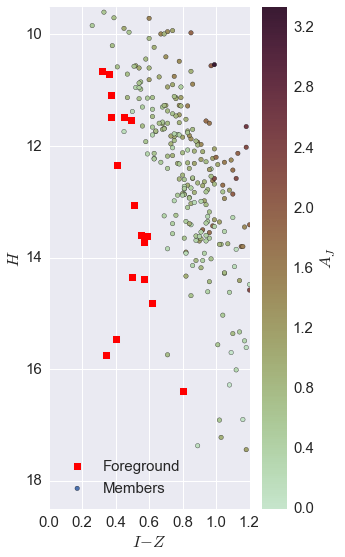

In [12]:
plt.figure(figsize=(4.5, 9))

plt.scatter(data['I-Z'].data, data['H-K'].data + data['Kmag'].data, c=data['AJ'].data, cmap=cmap, label='Members')
plt.plot(tbl3['I-Z'], tbl3['H-Ks']+tbl3['Ks'], 'rs', label='Foreground')

plt.xlim(0, 1.2)
plt.ylim(18.5, 9.5)
cbar = plt.colorbar()
cbar.set_label('$A_J$')
plt.xlabel("$I-Z$")
plt.ylabel("$H$")
plt.legend(loc='lower left')

## Table 4 - Background stars

In [13]:
col_names = ["ID","RA","Dec","SpectralType","Ref","R-I","I","I-Z","J-H","H-Ks","Ks"]
tbl4 = pd.read_csv('http://iopscience.iop.org/0004-637X/593/2/1093/fulltext/57692.tb4.txt', sep='\t', 
                   header=None, na_values='\ldots', names=col_names)

In [14]:
tbl4.head()

,ID,RA,Dec,SpectralType,Ref,R-I,I,I-Z,J-H,H-Ks,Ks
0,14,03 44 54.95,32 12 11.3,"K0-K1 III, K1-K2 III(IR)","1, 1",NaN,12.77,0.77,1.04,0.43,8.93
1,27,03 43 36.16,32 13 32.9,"F7-G6, giant(IR)","1, 2",NaN,12.57,0.54,0.83,0.29,9.68
2,34,03 44 15.48,32 02 35.1,G8 III(IR),1,2.28,16.91,1.18,1.98,0.98,9.89
3,43,03 45 03.19,32 04 05.7,"Giant(op, IR)","3, 2",NaN,14.64,0.83,1.21,0.45,10.29
4,73,03 45 09.64,32 16 03.6,Giant,2,NaN,13.73,0.55,0.83,0.28,10.81


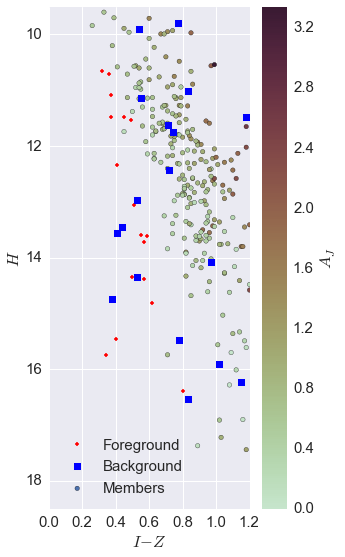

In [15]:
plt.figure(figsize=(4.5, 9))

plt.scatter(data['I-Z'].data, data['H-K'].data + data['Kmag'].data, c=data['AJ'].data, cmap=cmap, label='Members')
plt.plot(tbl3['I-Z'], tbl3['H-Ks']+tbl3['Ks'], 'r.', label='Foreground')
plt.plot(tbl4['I-Z'], tbl4['H-Ks']+tbl3['Ks'], 'bs', label='Background')

plt.xlim(0, 1.2)
plt.ylim(18.5, 9.5)
cbar = plt.colorbar()
cbar.set_label('$A_J$')
plt.xlabel("$I-Z$")
plt.ylabel("$H$")
plt.legend(loc='lower left')

### Table 8 - Adopted Temperature Scale

In [16]:
tbl8 = pd.read_csv("http://iopscience.iop.org/0004-637X/593/2/1093/fulltext/57692.tb8.txt", 
                   names = ["Spectral_Type", "Teff"],
                   sep = '\t')
tbl8

,Spectral_Type,Teff
0,M1,3705
1,M2,3560
2,M3,3415
3,M4,3270
4,M5,3125
5,M6,2990
6,M7,2880
7,M8,2710
8,M9,2400


Covert string spectral type to numerical type.

In [17]:
import gully_custom
tbl8["SpT"] = gully_custom.specType(tbl8.Spectral_Type)

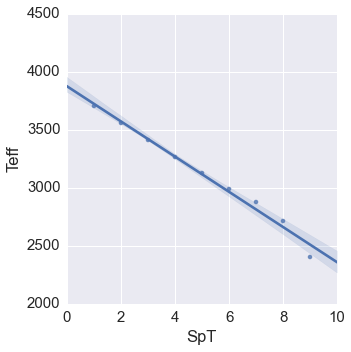

In [18]:
sns.lmplot("SpT", "Teff", tbl8)

# Save the data tables locally.

In [19]:
tbl2 = data.to_pandas()

    ! mkdir ../data/Luhman2003

In [30]:
for tbl, outname in zip([tbl2, tbl3, tbl4, tbl8], "tbl2, tbl3, tbl4, tbl8".split(", ")):
    tbl.to_csv("../data/Luhman2003/"+outname+".csv", sep='\t', index=False)

**The end.**